# Regularización (LAB)

En este lab vamos a practicar modelar con regularización. El [dataset](http://data.princeton.edu/wws509/datasets/#salary) consiste en datos de salarios de 52 profesores en una pequeña universidad, categorizados por género, ranking, título más alto, y años de servicio. (Si no está en el link o el link está caído, podés encontrar el dataset en la carpeta Data del Campus Virtual).

### Objetivos de aprendizaje

- Practicar el trabajo con variables categóricas y la generación de variables dummy.
- Buscar predecir algunas variables usando las otras.
- Utilizar regularización para generar modelos con mayor poder de generalización

### Requerimientos

El dataset contiene tres variables categóricas, cada una con dos o tres valores: "sx", "dg", "rk". Tu misión es la siguiente:.
* Crear variables dummy para cada una de las variables categóricas.
* Usando pandas `value_counts()` mirar la distribución de estas variables
* Usando seaborn, hacer [violin plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html) de los salarios usando estas variables.

Para cada variable categórica:
* Ajustar un modelo al dataset completo pero sin usar las variables dummy de esta variable categórica (incluyendo a los otros 2 sets de variables dummy).
* Usando pandas, seleccionar una muestra de datos (set de entrenamiento) y ajustar un modelo lineal a esa muestra.
* Aplicar este modelo ajustado al resto de los datos (set de testeo) y comparar los ajustes.
* Ahora usar regularizaciónn (ej. RidgeRegression o Lasso), ajustando el modelo sobre el mismo set de entrenamiento y midiendo la bondad de ajuste sobre el mismo set de testeo. Cómo se comparan los ajustes sobre el set de testo con y sin regularización?

Ejercicio bonus:
* Predecir años de servicio "yr" o años desde obtención del título "yd" a partir del salario y usando otras variables si lo desea. Ayuda regularizar?

### Material auxiliar
- [Modelos lineales de scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html), incluyendo regularizacion
- [Crear variables dummy con pandas](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


In [1]:
% matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score
import random

In [2]:
# Cargar la data
url = 'https://gist.githubusercontent.com/nicoTrombon/1817ef30d4c3173aa3d0f3e42b7642d4/raw/2d668a221a60f4847b4487102990d50859848476/salary.dat'
df = pd.read_csv(url, delim_whitespace=True)

# Inspeccionar
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [6]:
from IPython.display import display
# Aplicar value_counts() a las series "sx", "dg", and "rk"
display(df["sx"].value_counts())
# ....
display(df["dg"].value_counts())
display(df["rk"].value_counts())

male      38
female    14
Name: sx, dtype: int64

doctorate    34
masters      18
Name: dg, dtype: int64

full         20
assistant    18
associate    14
Name: rk, dtype: int64

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


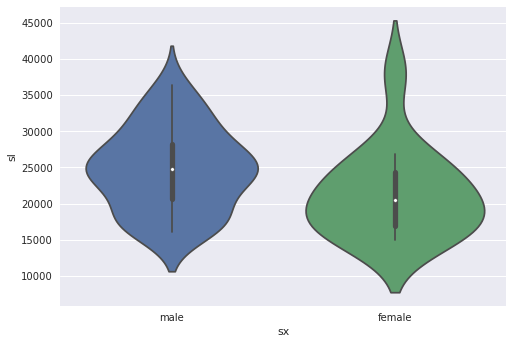

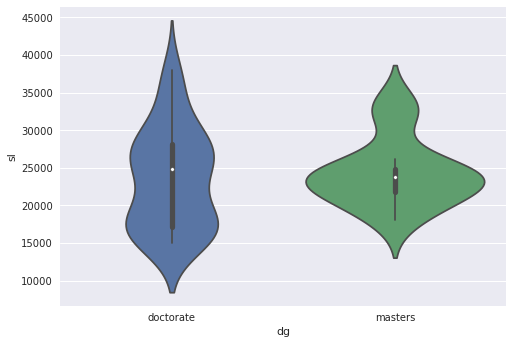

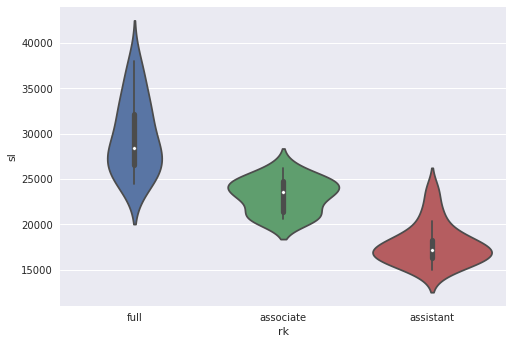

In [8]:
# Hacer unos violinplots
sns.violinplot(x="sx", y="sl", data=df)
plt.show()

# Repetir para "dg" y "rk"
sns.violinplot(x="dg", y="sl", data=df)
plt.show()

sns.violinplot(x="rk", y="sl", data=df)
plt.show()

In [9]:
# Crear variables "dummy"

categories = ["sx", "rk", "dg"]
for category in categories:
    series = df[category]
    dummies = pd.get_dummies(series, prefix=category)
    df = pd.concat([df, dummies], axis=1)
print (df.columns)
df.head()

Index(['sx', 'rk', 'yr', 'dg', 'yd', 'sl', 'sx_female', 'sx_male',
       'rk_assistant', 'rk_associate', 'rk_full', 'dg_doctorate',
       'dg_masters'],
      dtype='object')


,sx,rk,yr,dg,yd,sl,sx_female,sx_male,rk_assistant,rk_associate,rk_full,dg_doctorate,dg_masters
0,male,full,25,doctorate,35,36350,0,1,0,0,1,1,0
1,male,full,13,doctorate,22,35350,0,1,0,0,1,1,0
2,male,full,10,doctorate,23,28200,0,1,0,0,1,1,0
3,female,full,7,doctorate,27,26775,1,0,0,0,1,1,0
4,male,full,19,masters,30,33696,0,1,0,0,1,0,1


In [10]:
# Este es un ejemplo para ayudarlos a arrancar.
# Ajustamos un modelo a una pequeña fraccion de los datos

random.seed(1)
subset = df.sample(frac=0.1, replace=False)

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)
print ("Muestra:", lm.score(X, y))

# Aplicamos el modelo al dataset completo

X = df[[u'yr', u'yd']]
y = df[u'sl']
print ("Todo el dataset:", lm.score(X, y))

# Repetimos con regularizacion

X = subset[[u'yr', u'yd']]
y = subset[u'sl']

lm = linear_model.RidgeCV(alphas=[0.1, 1, 10])  # Definimos el rango de hiperparametros explicitamente
model = lm.fit(X, y)
predictions = lm.predict(X)
print ("Muestra con regularizacion:", lm.score(X, y))

# Aplicamos el modelo con regularización sobre todo el dataset

X = df[[u'yr', u'yd']]
y = df[u'sl']
print ("Todo el dataset con regularizacion:", lm.score(X, y))

# ¿Mejoraron los resultados?

Muestra: 0.127854950899
Todo el dataset: 0.366367562095
Muestra con regularizacion: 0.12058888689
Todo el dataset con regularizacion: 0.304385840726


In [15]:
# Ahora probar de ajustar un modelo solo usando los hombres
mask = df["sx"] == "male"
X = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
y = df[mask][u'sl']

## Ajustar el modelo lineal
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
predictions = lm.predict(X)


## Visualizar el fit

## Hacer un print del score del modelo
print ("Adjusted to MALE, predicting MALE:", lm.score(X, y))

# Aplicar este modelo ya ajustado sobre las mujeres y comparar el ajuste
Xf = df[~mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
yf = df[~mask][u'sl']
print ("Adjusted to MALE, predicting FEMALE:", lm.score(Xf, yf))

Adjusted to MALE, predicting MALE: 0.88630543814
Adjusted to MALE, predicting FEMALE: 0.69448811957


In [17]:
# Invirtamos el orden. Ajusten el modelo a las mujeres
lm = linear_model.LinearRegression()
model = lm.fit(Xf, yf)
print ("Adjusted to FEMALE, predicting FEMALE:", lm.score(Xf, yf))
# Aplicar el modelo ajustado sobre los hombres
print ("Adjusted to FEMALE, predicting MALE:", lm.score(X, y))

Adjusted to FEMALE, predicting FEMALE: 0.781837240731
Adjusted to FEMALE, predicting MALE: 0.657523429275


In [19]:
# Ahora hacer lo mismo pero usando regularizacion (RidgeCV)
rlmcv = linear_model.RidgeCV()

# Ajustar a las mujeres y predecir sobre hombres
ridge_cv_model = rlmcv.fit(Xf, yf)
print ("Adjusted to FEMALE, predicting MALE:", ridge_cv_model.score(X, y))

# Ajustar a los hombres y predecir sobre mujeres
ridge_cv_model = rlmcv.fit(X, y)
print ("Adjusted to MALE, predicting FEMALE:", ridge_cv_model.score(Xf, yf))

Adjusted to FEMALE, predicting MALE: 0.726774045766
Adjusted to MALE, predicting FEMALE: 0.697333350848


### Resultados

¿Mejora los resultados la regularización?
¿Tiene sentido ajustar sobre una muestra de un tipo (hombres o mujeres) y predecir sobre otra (el sexo opuesto)?

Probemos ahora con la siguiente variable categórica, "dg" (título, _degree_ en inglés).

In [20]:
# apliquemos esta mascara para ajustar un modelo usando solo a los que tienen titulo de doctorado
mask = (df["dg"] == "doctorate")

Xd = df[mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
yd = df[mask][u'sl']

Xnd = df[~mask][[u'yr', u'yd',
       u'rk_assistant', u'rk_associate', u'rk_full', u'dg_doctorate',
       u'dg_masters']]
ynd = df[~mask][u'sl']

## Ajustar el modelo sobre los que tienen doctorado
model = lm.fit(Xd, yd)

## Predecir sobre el resto
print(model.score(Xnd, ynd))

## Comparar ajustes

## Repetir el proceso pero con regularización
ridge_cv_model = rlmcv.fit(Xd, yd)
print(ridge_cv_model.score(Xnd, ynd))

0.648329528193
0.623830973771


### Resultados
¿Mejoró el ajuste usando regularización?

Ahora probemos con "rk" (ranking del docente). Para este caso, hay tres categorías.

In [ ]:
# Apliquemos esta mascara para ajustar un modelo usando solo a los de ranking "full"
mask = (df["rk"] == "full") 

## Ajustar el modelo sobre esta poblacion

## Predecir sobre el resto

## Comparar ajustes

## Repetir el proceso pero con regularización


# Resultados

¿Cómo resultó la regularización?